In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
from pycaret.regression import *
import datetime
from dateutil.relativedelta import relativedelta

In [37]:
filepath = r"C:\Users\ana18\OneDrive\Desktop\Python\myvenv\Practice\Projects\ts_forecasting\AirPassengers.csv"
df = pd.read_csv(filepath)
df.columns = ['Date','Number of Passengers']
df['Date'] = pd.to_datetime(df.Date)

print(df.head(10))

        Date  Number of Passengers
0 1949-01-01                   112
1 1949-02-01                   118
2 1949-03-01                   132
3 1949-04-01                   129
4 1949-05-01                   121
5 1949-06-01                   135
6 1949-07-01                   148
7 1949-08-01                   148
8 1949-09-01                   136
9 1949-10-01                   119


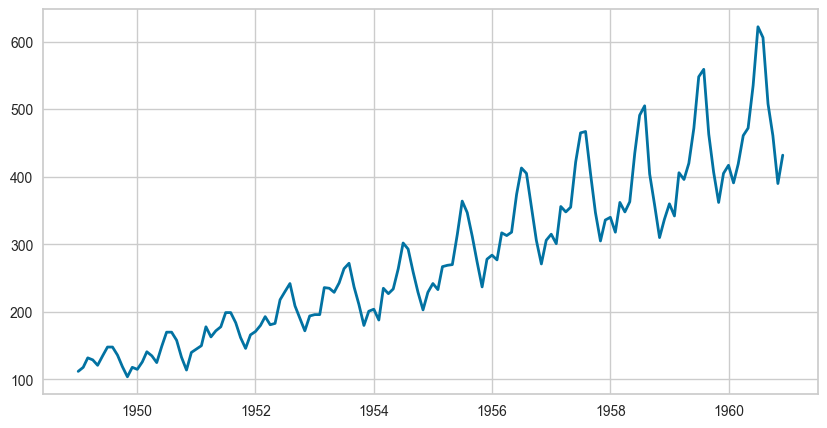

In [38]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    fig,ax = plt.subplots(1,1,figsize = (10,5))
    ax.plot(x,y,linewidth = 2)    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

In [39]:
#Introduce 12 month moving average
df['MA12'] = df['Number of Passengers'].rolling(12).mean()
df.head(20)

,Date,Number of Passengers,MA12
0,1949-01-01,112,NaN
1,1949-02-01,118,NaN
2,1949-03-01,132,NaN
3,1949-04-01,129,NaN
4,1949-05-01,121,NaN
5,1949-06-01,135,NaN
6,1949-07-01,148,NaN
7,1949-08-01,148,NaN
8,1949-09-01,136,NaN
9,1949-10-01,119,NaN


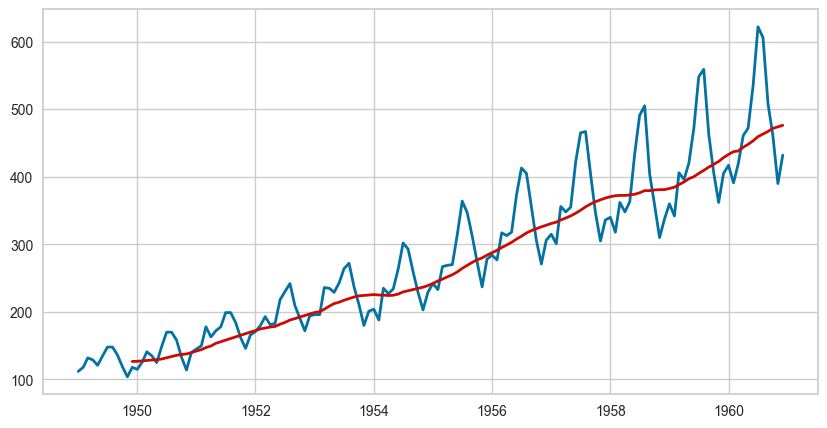

In [40]:
#plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')
#plot_df(df, x=df['Date'], y=df['MA12'], title='Number of US Airline passengers from 1949 to 1960')
fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(df['Date'],df['Number of Passengers'],'b',linewidth = 2)
ax.plot(df['Date'],df['MA12'],'r',linewidth = 2)

In [41]:
df['Month'] = [i.month for i in df['Date']]
df['Year'] = [i.year for i in df['Date']]
df['Series'] = np.arange(1,len(df)+1)

In [42]:
#drop non needed columns
df.drop(['Date','MA12'],axis=1,inplace=True)
df=df[['Series','Year','Month','Number of Passengers']]
df.head(3)

,Series,Year,Month,Number of Passengers
0,1,1949,1,112
1,2,1949,2,118
2,3,1949,3,132


In [43]:
#Train Test Split
#train = df[df['Year'] < 1960]
#test = df[df['Year'] >= 1960]
s = setup(data = df, target = 'Number of Passengers', fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'], fold = 2, transform_target = True, data_split_shuffle = False , fold_shuffle = False, train_size=0.95 ,session_id = 123)

,Description,Value
0,Session id,123
1,Target,Number of Passengers
2,Target type,Regression
3,Original data shape,"(144, 4)"
4,Transformed data shape,"(144, 4)"
5,Transformed train set shape,"(136, 4)"
6,Transformed test set shape,"(8, 4)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [44]:
import math 
summary=[]
for k in np.arange(2,13,1):
    s = setup(data = df, target = 'Number of Passengers', verbose = False, fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'], fold = k, transform_target = True, data_split_shuffle = False , fold_shuffle = False, train_size=0.95 ,session_id = 123)
    best = compare_models(sort='MAE')
    tuned_best_model = tune_model(best)
    nrows = math.floor(df.shape[0]*0.95)
    df_train = df.loc[0:nrows-1,:]
    predict_train=predict_model(tuned_best_model,df_train)
    mae_s = predict_train['Number of Passengers']-predict_train['prediction_label']
    mae = mae_s.abs().mean()
    summary.append([k,tuned_best_model,mae])
    s,best,tuned_best_model,df_train,predict_train,mae
    
    
    

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,49.6753,4091.6424,63.3641,-0.2589,0.2045,0.1489,0.0750
rf,Random Forest Regressor,51.2766,4473.9590,66.7307,-0.3392,0.2102,0.1524,0.1750
et,Extra Trees Regressor,53.2601,4612.6343,67.4921,-0.4051,0.2205,0.1634,0.1250
knn,K Neighbors Regressor,55.0316,5386.3164,73.1743,-0.5154,0.2232,0.1584,0.0450
dt,Decision Tree Regressor,56.3222,4957.0111,70.3151,-0.4730,0.2266,0.1728,0.0350
huber,Huber Regressor,60.0208,5025.6392,70.4800,-0.3950,0.2018,0.1939,0.0450
ada,AdaBoost Regressor,60.7291,6026.4486,77.6221,-0.7420,0.2494,0.1772,0.0900
omp,Orthogonal Matching Pursuit,61.3469,5287.2016,72.0441,-0.4498,0.2055,0.1982,0.0300
br,Bayesian Ridge,61.9680,5388.1439,72.8534,-0.4860,0.2069,0.1997,0.0400
ridge,Ridge Regression,63.7373,5702.2250,75.1191,-0.5867,0.2124,0.2059,2.8300


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,53.7238,4775.5095,69.1051,-0.6853,0.2629,0.1855
1,55.6121,4736.3726,68.8213,-0.0837,0.1750,0.1327
Mean,54.6680,4755.9411,68.9632,-0.3845,0.2190,0.1591
Std,0.9441,19.5685,0.1419,0.3008,0.0440,0.0264


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.7982,14.6964,3.8336,0.9987,0.0142,0.0109


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,44.1389,3059.0813,54.8271,-0.3127,0.1883,0.1424,0.0667
omp,Orthogonal Matching Pursuit,46.0030,3140.5790,53.1779,-0.0629,0.1646,0.1514,0.0300
et,Extra Trees Regressor,46.0443,3223.5775,56.6360,-0.4439,0.1963,0.1506,0.1000
rf,Random Forest Regressor,46.0696,3358.3622,57.7831,-0.3813,0.1918,0.1444,0.1533
dt,Decision Tree Regressor,46.8627,3403.1961,57.1858,-0.2362,0.1874,0.1461,0.0267
br,Bayesian Ridge,47.1472,3258.6228,54.6055,-0.1523,0.1686,0.1560,0.0267
huber,Huber Regressor,47.1688,3176.9438,54.5798,-0.1699,0.1702,0.1579,0.0333
lr,Linear Regression,47.8740,3334.3806,55.3648,-0.1903,0.1709,0.1588,0.0267
ridge,Ridge Regression,47.9241,3341.7290,55.4005,-0.1910,0.1709,0.1589,0.0333
lar,Least Angle Regression,47.9447,3343.8812,55.4244,-0.1925,0.1710,0.1590,0.0300


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,67.3918,5841.6663,76.4308,-3.4364,0.3950,0.2938
1,59.8919,5007.5483,70.7640,-0.6801,0.2378,0.1825
2,51.1974,4157.6981,64.4802,0.0050,0.1561,0.1170
Mean,59.4937,5002.3043,70.5583,-1.3705,0.2630,0.1978
Std,6.6173,687.4871,4.8810,1.4873,0.0992,0.0730


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.7982,14.6964,3.8336,0.9987,0.0142,0.0109


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,40.6259,2608.9350,50.3333,-0.2968,0.1716,0.1325,0.0500
rf,Random Forest Regressor,43.0870,3056.9396,54.2362,-0.4461,0.1820,0.1390,0.1125
huber,Huber Regressor,43.1434,2772.4546,49.7013,-0.0123,0.1585,0.1423,0.0275
dt,Decision Tree Regressor,44.7963,3497.5741,55.9875,-0.5811,0.1945,0.1448,0.0300
omp,Orthogonal Matching Pursuit,45.0539,3019.9770,51.8326,-0.1133,0.1658,0.1496,0.0275
br,Bayesian Ridge,45.2092,3035.8575,51.8123,-0.1105,0.1651,0.1493,0.0400
lar,Least Angle Regression,45.5855,3083.7683,52.0847,-0.1142,0.1653,0.1504,0.0225
ridge,Ridge Regression,45.5866,3083.7275,52.0875,-0.1145,0.1653,0.1504,0.0275
lr,Linear Regression,45.6264,3087.3598,52.1061,-0.1150,0.1653,0.1505,0.0350
ada,AdaBoost Regressor,46.0437,3568.7030,58.5569,-0.5793,0.1950,0.1450,0.0625


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,60.5999,4394.1426,66.2883,-4.3309,0.3743,0.2922
1,31.0151,1699.2652,41.2221,0.1860,0.1511,0.1109
2,45.8471,3247.1179,56.9835,0.0017,0.1612,0.1248
3,43.9654,3023.4881,54.9863,0.2695,0.1306,0.1000
Mean,45.3569,3091.0034,54.8701,-0.9684,0.2043,0.1570
Std,10.4906,957.0837,8.9599,1.9438,0.0988,0.0786


Fitting 4 folds for each of 10 candidates, totalling 40 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.7982,14.6964,3.8336,0.9987,0.0142,0.0109


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,37.1951,2084.9181,44.5017,-0.4149,0.1601,0.1279,0.0540
huber,Huber Regressor,41.2529,2502.2574,47.6523,-0.2582,0.1570,0.1383,0.0260
omp,Orthogonal Matching Pursuit,42.5548,2672.0475,48.9018,-0.3258,0.1610,0.1427,0.0240
br,Bayesian Ridge,43.0846,2704.3617,49.3472,-0.3618,0.1626,0.1447,0.0240
lar,Least Angle Regression,43.1762,2726.4080,49.4679,-0.3401,0.1620,0.1446,0.0220
ridge,Ridge Regression,43.1781,2726.3844,49.4687,-0.3405,0.1620,0.1446,0.0220
dt,Decision Tree Regressor,43.1909,2857.8455,51.8464,-0.5808,0.1808,0.1462,0.0200
lr,Linear Regression,43.2131,2723.5697,49.4420,-0.3391,0.1621,0.1448,0.0280
rf,Random Forest Regressor,43.4683,2730.0325,51.5913,-0.7598,0.1829,0.1475,0.0900
et,Extra Trees Regressor,44.0489,2921.4665,53.3085,-0.8609,0.1903,0.1510,0.0720


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,43.2802,2216.9832,47.0849,-3.4305,0.2731,0.2243
1,28.6698,1162.6422,34.0975,-0.1318,0.1424,0.1149
2,46.0560,3300.7365,57.4520,-0.0721,0.1863,0.1411
3,24.8096,1035.7470,32.1830,0.6140,0.0881,0.0697
4,43.6559,2663.0737,51.6050,0.3648,0.1242,0.1000
Mean,37.2943,2075.8365,44.4845,-0.5311,0.1628,0.1300
Std,8.7558,869.5815,9.8472,1.4758,0.0636,0.0525


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.7982,14.6964,3.8336,0.9987,0.0142,0.0109


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,35.5707,1920.0067,41.2270,-0.2324,0.1465,0.1220,0.0433
rf,Random Forest Regressor,37.0234,2192.5684,44.5668,-0.3924,0.1571,0.1270,0.0800
ada,AdaBoost Regressor,38.0842,2398.0713,47.4162,-0.5725,0.1684,0.1325,0.0467
huber,Huber Regressor,38.7762,2384.5362,45.0576,-0.0770,0.1466,0.1284,0.0217
omp,Orthogonal Matching Pursuit,39.4409,2503.7283,45.3318,-0.0774,0.1461,0.1298,0.0183
br,Bayesian Ridge,39.8756,2549.8550,45.8626,-0.0985,0.1476,0.1311,0.0200
ridge,Ridge Regression,40.1600,2580.0821,46.0855,-0.1035,0.1482,0.1323,0.0217
lar,Least Angle Regression,40.1622,2580.2113,46.0851,-0.1034,0.1482,0.1323,0.0200
lr,Linear Regression,40.3141,2591.4471,46.2784,-0.1197,0.1491,0.1329,0.0267
en,Elastic Net,40.8663,2570.8676,48.5914,-0.6170,0.1703,0.1404,0.0183


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,36.7556,1656.6118,40.7015,-2.6344,0.2579,0.2092
1,36.9850,1588.0675,39.8506,-1.2002,0.1910,0.1650
2,31.1913,1624.5705,40.3060,0.0704,0.1492,0.1143
3,30.4320,1243.5049,35.2634,0.3725,0.1116,0.0929
4,47.8381,2813.0546,53.0382,0.1832,0.1341,0.1182
5,32.8715,1469.7792,38.3377,0.6447,0.0903,0.0775
Mean,36.0122,1732.5981,41.2496,-0.4273,0.1557,0.1295
Std,5.8537,502.3288,5.5743,1.1459,0.0554,0.0447


Fitting 6 folds for each of 10 candidates, totalling 60 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.7982,14.6964,3.8336,0.9987,0.0142,0.0109


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,31.8431,1595.1715,38.4266,-0.2048,0.1430,0.1130,0.0386
dt,Decision Tree Regressor,33.9076,1725.1008,39.6013,-0.0889,0.1441,0.1186,0.0214
rf,Random Forest Regressor,34.0089,1872.4736,41.7780,-0.3219,0.1509,0.1177,0.0743
et,Extra Trees Regressor,37.0699,2182.3446,44.5770,-0.5102,0.1634,0.1293,0.0757
ada,AdaBoost Regressor,39.0362,2520.5131,48.4167,-0.5967,0.1719,0.1321,0.0443
huber,Huber Regressor,39.4213,2299.1981,45.2888,-0.3200,0.1592,0.1399,0.0214
omp,Orthogonal Matching Pursuit,40.1053,2403.9668,45.8612,-0.3552,0.1613,0.1421,0.0200
lr,Linear Regression,40.5853,2447.9816,46.3471,-0.3829,0.1625,0.1437,0.0200
ridge,Ridge Regression,40.6050,2450.9060,46.3667,-0.3837,0.1626,0.1438,0.0200
lar,Least Angle Regression,40.6084,2451.1091,46.3701,-0.3838,0.1626,0.1438,0.0186


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32.9476,1355.6411,36.8190,-1.8091,0.2372,0.1935
1,46.4868,2771.3548,52.6437,-3.3753,0.2917,0.2268
2,22.0700,747.5019,27.3405,0.3300,0.1088,0.0870
3,30.0357,1292.1612,35.9466,0.2684,0.1299,0.1040
4,46.9646,2842.5352,53.3154,-0.4604,0.1587,0.1326
5,30.0980,1720.0135,41.4730,0.5662,0.0977,0.0699
6,40.2877,2251.6089,47.4511,0.4006,0.1115,0.0911
Mean,35.5558,1854.4024,42.1413,-0.5828,0.1622,0.1293
Std,8.6269,735.1529,8.8606,1.3712,0.0687,0.0548


Fitting 7 folds for each of 10 candidates, totalling 70 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.7982,14.6964,3.8336,0.9987,0.0142,0.0109


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,31.0864,1514.5814,36.2959,-0.0184,0.1310,0.1068,0.0362
rf,Random Forest Regressor,34.5392,1856.2051,40.4556,-0.1103,0.1416,0.1163,0.0688
et,Extra Trees Regressor,36.5934,2167.5507,43.8745,-0.3124,0.1546,0.1249,0.0562
dt,Decision Tree Regressor,37.1583,2296.5917,44.8367,-0.2264,0.1565,0.1266,0.0200
huber,Huber Regressor,38.7555,2387.3448,45.4921,-0.3021,0.1550,0.1346,0.0213
ada,AdaBoost Regressor,39.1925,2472.1585,46.5780,-0.4377,0.1634,0.1311,0.0425
omp,Orthogonal Matching Pursuit,39.6017,2503.0467,46.2967,-0.3550,0.1583,0.1380,0.0188
lr,Linear Regression,40.1623,2546.5427,46.7562,-0.3806,0.1592,0.1395,0.0188
ridge,Ridge Regression,40.1624,2548.0890,46.7605,-0.3811,0.1593,0.1395,0.0175
lar,Least Angle Regression,40.1631,2548.1855,46.7610,-0.3811,0.1593,0.1395,0.0188


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,26.4786,943.4813,30.7161,-0.9566,0.1998,0.1604
1,52.3577,3372.0886,58.0697,-4.3461,0.3373,0.2626
2,17.4128,457.1007,21.3799,0.4466,0.0933,0.0749
3,23.4265,704.8200,26.5484,0.2106,0.1124,0.0948
4,54.3777,3653.7118,60.4459,-0.8249,0.2005,0.1683
5,25.2340,1125.6195,33.5503,0.6615,0.0854,0.0641
6,25.8718,827.0820,28.7590,0.7646,0.0756,0.0705
7,52.2150,3235.5029,56.8815,0.0580,0.1355,0.1181
Mean,34.6718,1789.9258,39.5439,-0.4983,0.1550,0.1267


Fitting 8 folds for each of 10 candidates, totalling 80 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.7982,14.6964,3.8336,0.9987,0.0142,0.0109


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,27.6502,1279.5984,33.7213,0.3199,0.1125,0.0900,0.0367
rf,Random Forest Regressor,32.3476,1761.4595,39.3823,0.1018,0.1301,0.1043,0.0689
ada,AdaBoost Regressor,34.9052,2213.2373,43.9278,-0.1350,0.1458,0.1119,0.0456
et,Extra Trees Regressor,36.0406,2250.3579,44.3382,-0.1402,0.1478,0.1170,0.0533
dt,Decision Tree Regressor,36.3333,2220.8462,44.0260,-0.2508,0.1579,0.1249,0.0178
huber,Huber Regressor,36.7953,2161.6736,43.2627,-0.0785,0.1443,0.1273,0.0200
omp,Orthogonal Matching Pursuit,37.4933,2246.5338,43.8180,-0.1016,0.1453,0.1289,0.0178
br,Bayesian Ridge,37.6426,2253.3752,43.8233,-0.0979,0.1449,0.1289,0.0189
ridge,Ridge Regression,37.9625,2278.8158,44.0633,-0.1106,0.1457,0.1301,0.0189
lar,Least Angle Regression,37.9634,2278.8535,44.0628,-0.1105,0.1457,0.1302,0.0167


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,35.2054,1663.5793,40.7870,-1.8877,0.2642,0.2047
1,47.4709,2974.9550,54.5431,-3.1235,0.3096,0.2356
2,26.0153,987.5201,31.4248,-0.1613,0.1381,0.1102
3,15.4754,335.7702,18.3240,0.7526,0.0751,0.0651
4,30.5782,1416.3617,37.6346,0.1753,0.1338,0.1029
5,42.7637,2241.3912,47.3433,-0.1490,0.1442,0.1256
6,37.1788,1790.1456,42.3101,0.3763,0.1127,0.0970
7,25.0910,1020.8362,31.9505,0.6868,0.0772,0.0603
8,47.9739,2825.3994,53.1545,0.1239,0.1272,0.1081


Fitting 9 folds for each of 10 candidates, totalling 90 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.7982,14.6964,3.8336,0.9987,0.0142,0.0109


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,29.1250,1274.1583,33.9442,-0.2735,0.1264,0.1036,0.0220
gbr,Gradient Boosting Regressor,31.5369,1468.6802,36.2997,-0.2759,0.1291,0.1087,0.0330
rf,Random Forest Regressor,32.1628,1629.1438,38.3438,-0.4150,0.1350,0.1094,0.0590
et,Extra Trees Regressor,32.9651,1846.6226,40.5716,-0.4832,0.1401,0.1100,0.0560
huber,Huber Regressor,35.0012,2064.7391,42.1659,-0.4764,0.1432,0.1184,0.0200
omp,Orthogonal Matching Pursuit,36.3524,2138.7117,42.8522,-0.5392,0.1464,0.1241,0.0180
lar,Least Angle Regression,36.5018,2159.9034,42.9828,-0.5370,0.1462,0.1240,0.0160
lr,Linear Regression,36.5026,2159.8439,42.9823,-0.5370,0.1462,0.1240,0.0230
ridge,Ridge Regression,36.5030,2159.9293,42.9843,-0.5373,0.1462,0.1240,0.0200
br,Bayesian Ridge,36.6310,2166.1190,43.2405,-0.5889,0.1486,0.1251,0.0170


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,22.2112,595.4255,24.4013,-0.7213,0.1703,0.1442
1,42.7074,2045.8306,45.2309,-8.2192,0.2829,0.2349
2,32.1724,1318.4341,36.3102,-1.6613,0.1819,0.1490
3,22.0040,678.3307,26.0448,0.0873,0.1140,0.0954
4,30.1042,1124.2692,33.5301,-0.4774,0.1413,0.1183
5,46.5311,2945.7600,54.2749,-1.5369,0.1937,0.1508
6,43.4816,2386.1673,48.8484,-0.3670,0.1477,0.1240
7,36.3763,1873.6275,43.2854,0.3084,0.1141,0.0932
8,33.2530,1812.9853,42.5792,0.4558,0.1027,0.0791


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,25.9540,1054.3480,31.2313,0.0457,0.1125,0.0932,0.0327
rf,Random Forest Regressor,33.2780,1640.5437,39.1255,-0.3563,0.1406,0.1178,0.0855
dt,Decision Tree Regressor,33.7769,1859.6281,40.2027,-0.2581,0.1429,0.1202,0.0191
ada,AdaBoost Regressor,34.4945,1986.7370,42.1145,-0.4322,0.1468,0.1180,0.0400
et,Extra Trees Regressor,35.1049,1877.6444,41.6543,-0.4879,0.1494,0.1243,0.0591
huber,Huber Regressor,36.4684,2064.5438,42.3466,-0.3319,0.1453,0.1264,0.0209
omp,Orthogonal Matching Pursuit,37.5191,2161.5911,43.1588,-0.3983,0.1485,0.1302,0.0191
br,Bayesian Ridge,37.8484,2184.7343,43.4411,-0.4250,0.1495,0.1312,0.0173
lar,Least Angle Regression,37.9425,2195.2723,43.4117,-0.3917,0.1487,0.1313,0.0391
ridge,Ridge Regression,37.9427,2195.2370,43.4123,-0.3920,0.1487,0.1313,0.0145


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,22.1195,691.3724,26.2940,-1.4638,0.1849,0.1446
1,30.7802,1038.5293,32.2262,-3.5576,0.1977,0.1737
2,23.0254,739.6649,27.1968,-0.6065,0.1391,0.1111
3,22.5973,689.0268,26.2493,0.0852,0.1139,0.0940
4,20.1649,544.8928,23.3429,0.5547,0.0947,0.0822
5,26.6579,1292.8220,35.9558,0.4591,0.1186,0.0860
6,30.3441,1241.9534,35.2414,0.5820,0.1031,0.0904
7,29.7950,1264.3034,35.5570,0.5655,0.1030,0.0894
8,13.9154,277.2480,16.6508,0.8766,0.0434,0.0377


Fitting 11 folds for each of 10 candidates, totalling 110 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.7982,14.6964,3.8336,0.9987,0.0142,0.0109


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,27.9881,1171.5056,32.5013,-0.0443,0.1187,0.0997,0.0308
et,Extra Trees Regressor,36.2819,2166.6831,43.9791,-0.7932,0.1551,0.1273,0.0508
rf,Random Forest Regressor,37.0062,2020.6627,42.8346,-0.6323,0.1519,0.1290,0.0608
huber,Huber Regressor,37.1398,2238.9690,43.8929,-0.6082,0.1486,0.1280,0.0175
omp,Orthogonal Matching Pursuit,37.9142,2329.8305,44.5357,-0.6668,0.1510,0.1309,0.0150
lr,Linear Regression,38.3468,2365.4947,44.7834,-0.6744,0.1512,0.1322,0.0175
ridge,Ridge Regression,38.3968,2370.4232,44.8331,-0.6766,0.1514,0.1324,0.0200
lar,Least Angle Regression,38.3968,2370.4834,44.8326,-0.6764,0.1514,0.1324,0.0158
br,Bayesian Ridge,38.4113,2362.8686,44.9480,-0.7117,0.1529,0.1330,0.0158
ada,AdaBoost Regressor,38.6130,2357.7663,44.8629,-0.6563,0.1568,0.1296,0.0367


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18.3655,445.1720,21.0991,-0.4897,0.1464,0.1220
1,31.2482,1074.2608,32.7759,-3.3072,0.2007,0.1759
2,25.7891,1128.7426,33.5968,-1.2177,0.1675,0.1191
3,19.5830,568.0650,23.8341,0.4159,0.1011,0.0816
4,18.4189,476.9463,21.8391,0.2026,0.1025,0.0899
5,32.7504,1121.2927,33.4857,-0.2947,0.1430,0.1303
6,45.8721,2449.5916,49.4933,-0.8402,0.1791,0.1532
7,47.9132,2871.0524,53.5822,-0.4573,0.1581,0.1354
8,36.7526,1866.0410,43.1977,0.3956,0.1087,0.0918


Fitting 12 folds for each of 10 candidates, totalling 120 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.7982,14.6964,3.8336,0.9987,0.0142,0.0109


In [45]:
summary_df = pd.DataFrame(summary,columns=['kFolds','Model','MAE'])
best_kFold = summary_df.sort_values(by=['MAE','kFolds'],ascending=True).iloc[0,0]

In [46]:
summary_df

,kFolds,Model,MAE
0,2,([DecisionTreeRegressor(criterion='friedman_ms...,2.798185e+00
1,3,([DecisionTreeRegressor(criterion='friedman_ms...,2.798185e+00
2,4,([DecisionTreeRegressor(criterion='friedman_ms...,2.798185e+00
3,5,([DecisionTreeRegressor(criterion='friedman_ms...,2.798185e+00
4,6,([DecisionTreeRegressor(criterion='friedman_ms...,2.798185e+00
5,7,([DecisionTreeRegressor(criterion='friedman_ms...,2.798185e+00
6,8,([DecisionTreeRegressor(criterion='friedman_ms...,2.798185e+00
7,9,([DecisionTreeRegressor(criterion='friedman_ms...,2.798185e+00
8,10,DecisionTreeRegressor(random_state=123),8.735496e-14
9,11,([DecisionTreeRegressor(criterion='friedman_ms...,2.798185e+00


In [47]:
best_kFold

10

In [48]:
s = setup(data = df, target = 'Number of Passengers', fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'], fold = best_kFold, transform_target = True, data_split_shuffle = False , fold_shuffle = False, train_size=0.95 ,session_id = 123)
best = compare_models(sort='MAE')
tuned_best_model = tune_model(best)
tuned_best_model
 

,Description,Value
0,Session id,123
1,Target,Number of Passengers
2,Target type,Regression
3,Original data shape,"(144, 4)"
4,Transformed data shape,"(144, 4)"
5,Transformed train set shape,"(136, 4)"
6,Transformed test set shape,"(8, 4)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,29.1250,1274.1583,33.9442,-0.2735,0.1264,0.1036,0.0200
gbr,Gradient Boosting Regressor,31.5369,1468.6802,36.2997,-0.2759,0.1291,0.1087,0.0370
rf,Random Forest Regressor,32.1628,1629.1438,38.3438,-0.4150,0.1350,0.1094,0.0850
et,Extra Trees Regressor,32.9651,1846.6226,40.5716,-0.4832,0.1401,0.1100,0.0680
huber,Huber Regressor,35.0012,2064.7391,42.1659,-0.4764,0.1432,0.1184,0.0220
omp,Orthogonal Matching Pursuit,36.3524,2138.7117,42.8522,-0.5392,0.1464,0.1241,0.0190
lar,Least Angle Regression,36.5018,2159.9034,42.9828,-0.5370,0.1462,0.1240,0.0170
lr,Linear Regression,36.5026,2159.8439,42.9823,-0.5370,0.1462,0.1240,0.0160
ridge,Ridge Regression,36.5030,2159.9293,42.9843,-0.5373,0.1462,0.1240,0.0160
br,Bayesian Ridge,36.6310,2166.1190,43.2405,-0.5889,0.1486,0.1251,0.0230


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,22.2112,595.4255,24.4013,-0.7213,0.1703,0.1442
1,42.7074,2045.8306,45.2309,-8.2192,0.2829,0.2349
2,32.1724,1318.4341,36.3102,-1.6613,0.1819,0.1490
3,22.0040,678.3307,26.0448,0.0873,0.1140,0.0954
4,30.1042,1124.2692,33.5301,-0.4774,0.1413,0.1183
5,46.5311,2945.7600,54.2749,-1.5369,0.1937,0.1508
6,43.4816,2386.1673,48.8484,-0.3670,0.1477,0.1240
7,36.3763,1873.6275,43.2854,0.3084,0.1141,0.0932
8,33.2530,1812.9853,42.5792,0.4558,0.1027,0.0791


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


DecisionTreeRegressor(random_state=123)

In [49]:
predictions = predict_model(tuned_best_model,data=df)
predictions['Date'] = pd.date_range(start='1949-01-01', end = '1960-12-01', freq = 'MS')
pd.set_option('display.max_rows', None)
predictions


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,2.0764,92.5625,9.6209,0.9935,0.0194,0.0041


,Series,Year,Month,Number of Passengers,prediction_label,Date
0,1,1949,1,112,112.0,1949-01-01
1,2,1949,2,118,118.0,1949-02-01
2,3,1949,3,132,132.0,1949-03-01
3,4,1949,4,129,129.0,1949-04-01
4,5,1949,5,121,121.0,1949-05-01
5,6,1949,6,135,135.0,1949-06-01
6,7,1949,7,148,148.0,1949-07-01
7,8,1949,8,148,148.0,1949-08-01
8,9,1949,9,136,136.0,1949-09-01
9,10,1949,10,119,119.0,1949-10-01


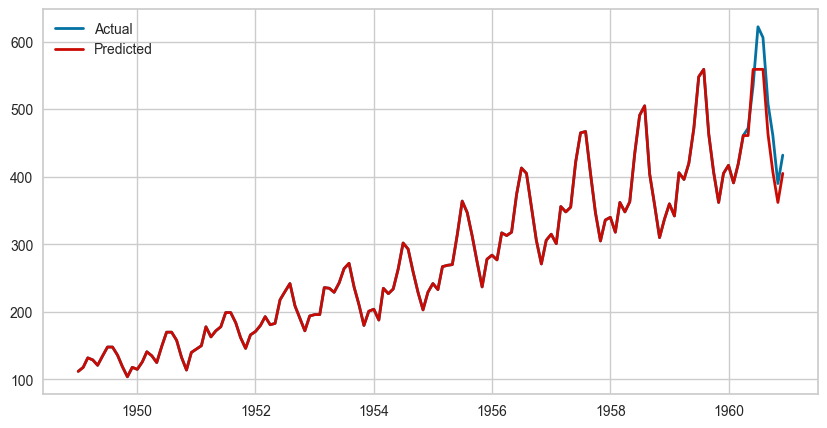

In [50]:
fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(predictions['Date'],predictions['Number of Passengers'],'b',linewidth = 2,label='Actual')
ax.plot(predictions['Date'],predictions['prediction_label'],'r',linewidth = 2,label='Predicted')
ax.legend()

In [51]:
#Future Data
max_year = df.Year.max().astype(np.int64)
max_month = df.where(df.Year==max_year).Month.max().astype(np.int64)

min_year = df.Year.min().astype(np.int64)
min_month = df.where(df.Year==min_year).Month.min().astype(np.int64)
print(f'Min Year - Month is : {min_year} - {min_month}')
print(f'Max Year - Month is : {max_year} - {max_month}')

Min Year - Month is : 1949 - 1
Max Year - Month is : 1960 - 12


In [52]:
#predicting for next 6 months
# adding months to a given date
print('old date is : ' + str(np.datetime64(f'{max_year}-{max_month}')))
new_date = np.datetime64(f'{max_year}-{max_month}')+ np.timedelta64(24, 'M')
print('new date is : '+str(new_date))
type(new_date)

old date is : 1960-12
new date is : 1962-12


numpy.datetime64

In [53]:

future_dates = pd.date_range(start=datetime.date(max_year,max_month,1)+relativedelta(months=1)
                             ,end=datetime.date(new_date.item().year,new_date.item().month,1)
                             ,freq = 'MS'
                             )
future_df = pd.DataFrame()

future_df['Month'] = [i.month for i in future_dates]
future_df['Year'] = [i.year for i in future_dates]    
future_df['Series'] = np.arange(df.shape[0]+1,df.shape[0]+1+len(future_dates),1)

predictions_future = predict_model(tuned_best_model,data=future_df)
predictions_future

,Month,Year,Series,prediction_label
0,1,1961,145,461.0
1,2,1961,146,461.0
2,3,1961,147,461.0
3,4,1961,148,461.0
4,5,1961,149,461.0
5,6,1961,150,559.0
6,7,1961,151,559.0
7,8,1961,152,559.0
8,9,1961,153,463.0
9,10,1961,154,407.0


In [54]:
tuned_best_model

DecisionTreeRegressor(random_state=123)

In [55]:
predictions = pd.concat([df,predictions_future],axis = 0)
pd.set_option('display.max_rows', None)
predictions


,Series,Year,Month,Number of Passengers,prediction_label
0,1,1949,1,112.0,NaN
1,2,1949,2,118.0,NaN
2,3,1949,3,132.0,NaN
3,4,1949,4,129.0,NaN
4,5,1949,5,121.0,NaN
5,6,1949,6,135.0,NaN
6,7,1949,7,148.0,NaN
7,8,1949,8,148.0,NaN
8,9,1949,9,136.0,NaN
9,10,1949,10,119.0,NaN


In [56]:
pd.reset_option('display.max_rows')
predictions = pd.concat([df,predictions_future],axis = 0)
predictions['Date'] = pd.date_range(start=datetime.date(min_year,min_month,1),
                                    end=datetime.date(new_date.item().year,new_date.item().month,1)
                                    , freq='MS')
predictions

,Series,Year,Month,Number of Passengers,prediction_label,Date
0,1,1949,1,112.0,NaN,1949-01-01
1,2,1949,2,118.0,NaN,1949-02-01
2,3,1949,3,132.0,NaN,1949-03-01
3,4,1949,4,129.0,NaN,1949-04-01
4,5,1949,5,121.0,NaN,1949-05-01
...,...,...,...,...,...,...
19,164,1962,8,NaN,559.0,1962-08-01
20,165,1962,9,NaN,463.0,1962-09-01
21,166,1962,10,NaN,407.0,1962-10-01
22,167,1962,11,NaN,362.0,1962-11-01


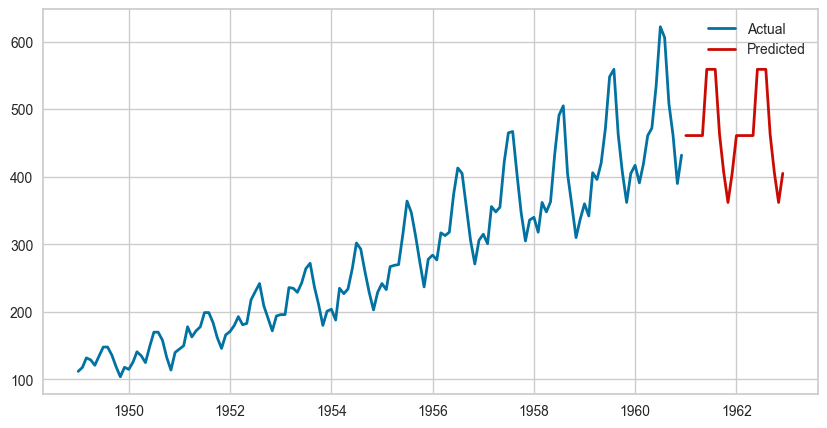

In [ ]:
fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(predictions['Date'],predictions['Number of Passengers'],'b',linewidth = 2,label='Actual')
ax.plot(predictions['Date'],predictions['prediction_label'],'r',linewidth = 2,label='Predicted')
ax.legend()
#placeholder